    Hours_Study  Prep_Score  Attendance  Assignments  Sleep_Hours  \
0             2          40          60            0            5   
1             3          45          65            1            6   
2             4          50          70            1            6   
3             5          55          75            1            7   
4             6          60          80            1            6   
5             7          65          85            1            7   
6             8          70          90            1            8   
7             9          80          95            1            8   
8            10          85          98            1            7   
9             3          42          62            0            5   
10            6          58          88            1            6   
11            7          75          91            1            7   
12            5          52          72            1            6   
13            8          78       

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

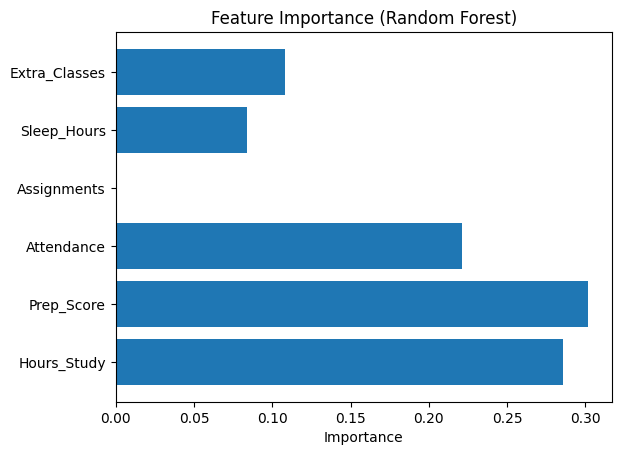

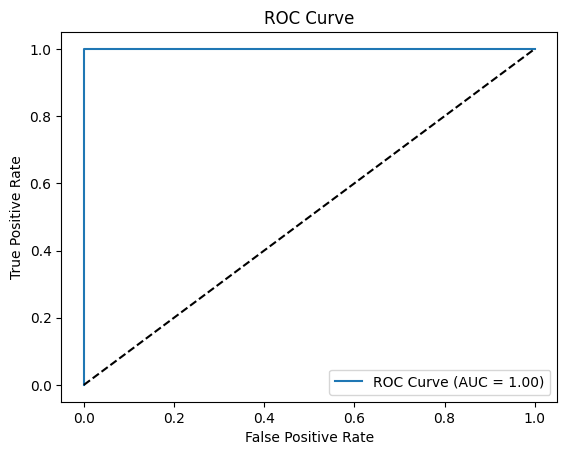

⚠️ Student may FAIL. Recommendation:
- Increase study hours to 6+
- Improve attendance above 80%
- Take extra classes if possible


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ----- Dataset -----
data = {
    "Hours_Study": [2,3,4,5,6,7,8,9,10,3,6,7,5,8],
    "Prep_Score": [40,45,50,55,60,65,70,80,85,42,58,75,52,78],
    "Attendance": [60,65,70,75,80,85,90,95,98,62,88,91,72,96],
    "Assignments": [0,1,1,1,1,1,1,1,1,0,1,1,1,1],
    "Sleep_Hours": [5,6,6,7,6,7,8,8,7,5,6,7,6,8],
    "Extra_Classes": [0,0,1,1,1,1,1,1,1,0,1,1,0,1],
    "Pass_Fail":    [0,0,0,1,1,1,1,1,1,0,1,1,0,1]
}

df = pd.DataFrame(data)
print(df)

X = df.drop("Pass_Fail", axis=1)
y = df["Pass_Fail"]

# ----- Split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----- Models -----
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(8,), max_iter=2000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

# ----- Feature Importance from Random Forest -----
rf = models["Random Forest"]
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

# ----- ROC Curve for one model -----
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# ----- Recommendation -----
sample = pd.DataFrame({
    "Hours_Study":[4],
    "Prep_Score":[50],
    "Attendance":[70],
    "Assignments":[1],
    "Sleep_Hours":[5],
    "Extra_Classes":[0]
})
pred = rf.predict(sample)[0]
if pred == 1:
    print("🎉 Student is likely to PASS!")
else:
    print("⚠️ Student may FAIL. Recommendation:")
    print("- Increase study hours to 6+")
    print("- Improve attendance above 80%")
    print("- Take extra classes if possible")
